# INFO 3402 – Class 13: Data cleaning exercise

[Brian C. Keegan, Ph.D.](http://brianckeegan.com/)  
[Assistant Professor, Department of Information Science](https://www.colorado.edu/cmci/people/information-science/brian-c-keegan)  
University of Colorado Boulder  

Copyright and distributed under an [MIT License](https://opensource.org/licenses/MIT)  

In [1]:
import pandas as pd

pd.options.display.max_columns = 100

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

I got this above-average gnarly data on [passenger traffic reports](https://www.flydenver.com/about/financials/passenger_traffic) from the Denver International Airport.

* Medium difficulty: `passengers_df` or `flights_df`
* Hard difficulty: `pass_type_df`

The goal is to turn this structured but very untidy and irregular data into something we can simply visualize in `seaborn`.

You'll almost certainly want these documentation resources available:

* pandas [`read_excel`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html)
* pandas [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html)
* seaborn [`catplot`](https://seaborn.pydata.org/generated/seaborn.catplot.html)

In [2]:
# Read in the data
passengers_df = pd.read_excel('DIA_activity.xlsx',sheet_name='Passengers')
flights_df = pd.read_excel('DIA_activity.xlsx',sheet_name='Flights')
pass_type_df = pd.read_excel('DIA_activity.xlsx',sheet_name='Passenger by Type')

Go through the EDA checklist:

1. **Formulate your question** → see “Characteristics of a good question”
2. **Read in your data** → Is it properly formatted? Perform cleanup activities
3. **Check the packaging** → Make sure there are the right number of rows & columns, formats, etc.
4. **Look at the top and bottom of data** → Confirm that all observations are there
5. **Check the “n”s** → Identify “landmark” values and to check expectations (number of states, etc.)
6. **Validate against an external data source** → Right order of magnitude, expected distribution, etc.
7. **Make a plot** → Checking and creating expectations about the shape of data and appropriate analyses
8. **Try an easy solution** → What is the simplest test for your question?

## Fix the columns and index

(Hint: The easiest way is to read in the data again, but use different parameters. Read the documentation!)

In [4]:
passengers_df = pd.read_excel('DIA_activity.xlsx',sheet_name='Passengers',header=(0,1),index_col=0)
passengers_df.head()

Total Passengers                American                                \
Month            American Airlines, Inc. American Eagle Airlines, Inc.   
1995-02                             3553                           NaN   
1995-03                           134467                           NaN   
1995-04                           113392                           NaN   
1995-05                           114054                           NaN   
1995-06                           131761                           NaN   

Total Passengers                                                         \
Month            Compass/American Eagle Envoy (formerly American Eagle)   
1995-02                             NaN                             NaN   
1995-03                             NaN                             NaN   
1995-04                             NaN                             NaN   
1995-05                             NaN                             NaN   
1995-06                             NaN                             NaN   

Total Passengers                                                \
Month            ExpressJet/American Eagle Mesa/American Eagle   
1995-02                                NaN                 NaN   
1995-03                                NaN                 NaN   
1995-04                                NaN                 NaN   
1995-05                                NaN                 NaN   
1995-06                                NaN                 NaN   

Total Passengers                                                  \
Month            Mesa/US Airways Express Republic/American Eagle   
1995-02                              NaN                     NaN   
1995-03                              NaN                     NaN   
1995-04                              NaN                     NaN   
1995-05                              NaN                     NaN   
1995-06                              NaN                     NaN   

Total Passengers                                                             \
Month            Skywest/American Eagle Trans World Airlines, Inc.   US Air   
1995-02                             NaN                     1182.0   1098.0   
1995-03                             NaN                    44881.0  48848.0   
1995-04                             NaN                    36305.0  34532.0   
1995-05                             NaN                    39638.0  34298.0   
1995-06                             NaN                    48664.0  48923.0   

Total Passengers                       American Total         Cargo  \
Month            US Airways, Inc. Unnamed: 13_level_1 ABX Air, Inc.   
1995-02                       NaN                5833           0.0   
1995-03                       NaN              228196           0.0   
1995-04                       NaN              184229           0.0   
1995-05                       NaN              187990           0.0   
1995-06                       NaN              229348           0.0   

Total Passengers                                          Cargo Total  \
Month            Atlas Air, Inc. Kalitta Air, LLC Unnamed: 17_level_1   
1995-02                      NaN              NaN                   0   
1995-03                      NaN              NaN                   0   
1995-04                      NaN              NaN                   0   
1995-05                      NaN              NaN                   0   
1995-06                      NaN              NaN                   0   

Total Passengers                   Delta                                    \
Month            Comair/Delta Connection Compass Airlines/Delta Connection   
1995-02                              NaN                               NaN   
1995-03                              NaN                               NaN   
1995-04                              NaN                               NaN   
1995-05                              NaN                     

## Melt the data down

(Hint: pandas's `melt` and `stack` functions both turn columns into rows)

In [8]:
passengers_df2 = passengers_df.unstack()
passengers_df2.head(20)

Total Passengers  Month                           
American          American Airlines, Inc.  1995-02      3553.0
                                           1995-03    134467.0
                                           1995-04    113392.0
                                           1995-05    114054.0
                                           1995-06    131761.0
                                           1995-07    143365.0
                                           1995-08    143239.0
                                           1995-09    114689.0
                                           1995-10    109464.0
                                           1995-11     97570.0
                                           1995-12    124502.0
                                           1996-01    119800.0
                                           1996-02    112698.0
                                           1996-03    143864.0
                                           1996-04    103689.0
    

## Make sure each variable has its own column... and rename the columns

(Hint: Mutate column names with wither [`rename`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html?highlight=rename#pandas.DataFrame.rename) function or [`columns`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.columns.html?highlight=columns#pandas.DataFrame.columns) attribute.

In [14]:
passengers_df3 = passengers_df2.reset_index()
passengers_df3.tail(20)

,Total Passengers,Month,level_2,0
66900,Grand Total,Unnamed: 239_level_1,2016-10,5226077.0
66901,Grand Total,Unnamed: 239_level_1,2016-11,4695897.0
66902,Grand Total,Unnamed: 239_level_1,2016-12,4825224.0
66903,Grand Total,Unnamed: 239_level_1,2017-01,4434862.0
66904,Grand Total,Unnamed: 239_level_1,2017-02,4204744.0
66905,Grand Total,Unnamed: 239_level_1,2017-03,5193855.0
66906,Grand Total,Unnamed: 239_level_1,2017-04,4812910.0
66907,Grand Total,Unnamed: 239_level_1,2017-05,5271223.0
66908,Grand Total,Unnamed: 239_level_1,2017-06,5650682.0
66909,Grand Total,Unnamed: 239_level_1,2017-07,5839661.0


In [16]:
passengers_df3.head()

,Total Passengers,Month,level_2,0
0,American,"American Airlines, Inc.",1995-02,3553.0
1,American,"American Airlines, Inc.",1995-03,134467.0
2,American,"American Airlines, Inc.",1995-04,113392.0
3,American,"American Airlines, Inc.",1995-05,114054.0
4,American,"American Airlines, Inc.",1995-06,131761.0


In [17]:
passengers_df3.columns = ['parent_carrier','carrier','date','passengers']
passengers_df3.head()

,parent_carrier,carrier,date,passengers
0,American,"American Airlines, Inc.",1995-02,3553.0
1,American,"American Airlines, Inc.",1995-03,134467.0
2,American,"American Airlines, Inc.",1995-04,113392.0
3,American,"American Airlines, Inc.",1995-05,114054.0
4,American,"American Airlines, Inc.",1995-06,131761.0


## Remove the miscellaneous rows

(Hint: Where did the "Unnamed: N_level_1" rows come from in the original spreadsheet?)

In [31]:
passengers_df4 = passengers_df3[~passengers_df3['carrier'].str.contains('Unnamed:')]
passengers_df4.tail()

,parent_carrier,carrier,date,passengers
66355,United Express,Trans States Airlines/UAX,2018-01,117629.0
66356,United Express,Trans States Airlines/UAX,2018-02,117766.0
66357,United Express,Trans States Airlines/UAX,2018-03,144067.0
66358,United Express,Trans States Airlines/UAX,2018-04,130144.0
66359,United Express,Trans States Airlines/UAX,2018-05,133981.0


In [28]:
passengers_df4.head()

,parent_carrier,carrier,date,passengers
0,American,"American Airlines, Inc.",1995-02,3553.0
1,American,"American Airlines, Inc.",1995-03,134467.0
2,American,"American Airlines, Inc.",1995-04,113392.0
3,American,"American Airlines, Inc.",1995-05,114054.0
4,American,"American Airlines, Inc.",1995-06,131761.0


## Separate the "date" column into year and months

(**Normie hint**: Access the month and year as attributes of a datetime/timestamp)  
(**Elite hint**: Use `.str.extract` and pass a regular expression that matches a 4 digit number for year and 2 digit number of month)

In [32]:
passengers_df4['date'] = pd.to_datetime(passengers_df4['date'])
passengers_df4.tail()

/Users/briankeegan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,parent_carrier,carrier,date,passengers
66355,United Express,Trans States Airlines/UAX,2018-01-01,117629.0
66356,United Express,Trans States Airlines/UAX,2018-02-01,117766.0
66357,United Express,Trans States Airlines/UAX,2018-03-01,144067.0
66358,United Express,Trans States Airlines/UAX,2018-04-01,130144.0
66359,United Express,Trans States Airlines/UAX,2018-05-01,133981.0


In [37]:
passengers_df4.loc[0,'date'].day

1

In [39]:
passengers_df4['month'] = passengers_df4['date'].apply(lambda x:x.month)
passengers_df4['year'] = passengers_df4['date'].apply(lambda x:x.year)

passengers_df4.head()

/Users/briankeegan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/briankeegan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,parent_carrier,carrier,date,passengers,month,year
0,American,"American Airlines, Inc.",1995-02-01,3553.0,2,1995
1,American,"American Airlines, Inc.",1995-03-01,134467.0,3,1995
2,American,"American Airlines, Inc.",1995-04-01,113392.0,4,1995
3,American,"American Airlines, Inc.",1995-05-01,114054.0,5,1995
4,American,"American Airlines, Inc.",1995-06-01,131761.0,6,1995


## Pivot the data into total passengers by parent carrier per year

(Hint: Pivot table needs to know columns, indexes, values, and *probably* an aggfunc)

In [45]:
passengers_df5 = pd.pivot_table(columns='parent_carrier',
                                index='year',
                                values='passengers',
                                data=passengers_df4,aggfunc='sum')
passengers_df5

parent_carrier,American,Cargo,Delta,Frontier,Other,Southwest,United,United Express
year,,,,,,,,
1995,2091658.0,0.0,1881156.0,522050.0,1663348.0,0.0,18506878.0,1624669.0
1996,2337626.0,0.0,2397300.0,1141458.0,1441670.0,0.0,23033370.0,1944750.0
1997,2438897.0,0.0,2423023.0,1316475.0,2607159.0,0.0,24115642.0,2068641.0
1998,2664509.0,0.0,2512995.0,1529273.0,1731195.0,0.0,26257746.0,2135682.0
1999,2496477.0,0.0,2711546.0,2308062.0,1890650.0,0.0,26250614.0,2376668.0
2000,2861190.0,0.0,2929113.0,3040791.0,2229374.0,0.0,25331891.0,2359328.0
2001,2886817.0,0.0,2667772.0,3105091.0,2270525.0,0.0,22838420.0,2324181.0
2002,2624043.0,0.0,2713276.0,3916598.0,3037973.0,0.0,20566570.0,2793624.0
2003,2497413.0,0.0,2571940.0,5434227.0,3284239.0,118335.0,20299304.0,3299809.0


## Plot the pivot table

Is the drop-off in 2018 a "real" effect or caused by something else?

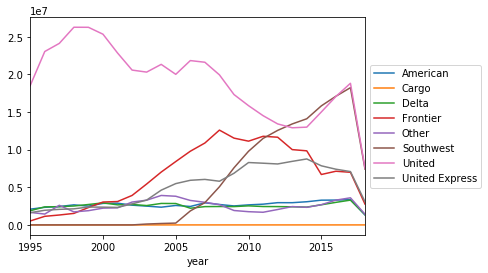

In [47]:

ax = passengers_df5.plot(legend=False)
ax.legend(loc='center left',bbox_to_anchor = (1,.5))

## Plot data

Make a seaborn `catplot` with "month" on the x-axis, "passengers" on the y-axis, and hues for the different parent carriers (probably excluding "Other"). What is the top month (on average) for passengers into DIA?

In [48]:
passengers_df4.head()

,parent_carrier,carrier,date,passengers,month,year
0,American,"American Airlines, Inc.",1995-02-01,3553.0,2,1995
1,American,"American Airlines, Inc.",1995-03-01,134467.0,3,1995
2,American,"American Airlines, Inc.",1995-04-01,113392.0,4,1995
3,American,"American Airlines, Inc.",1995-05-01,114054.0,5,1995
4,American,"American Airlines, Inc.",1995-06-01,131761.0,6,1995


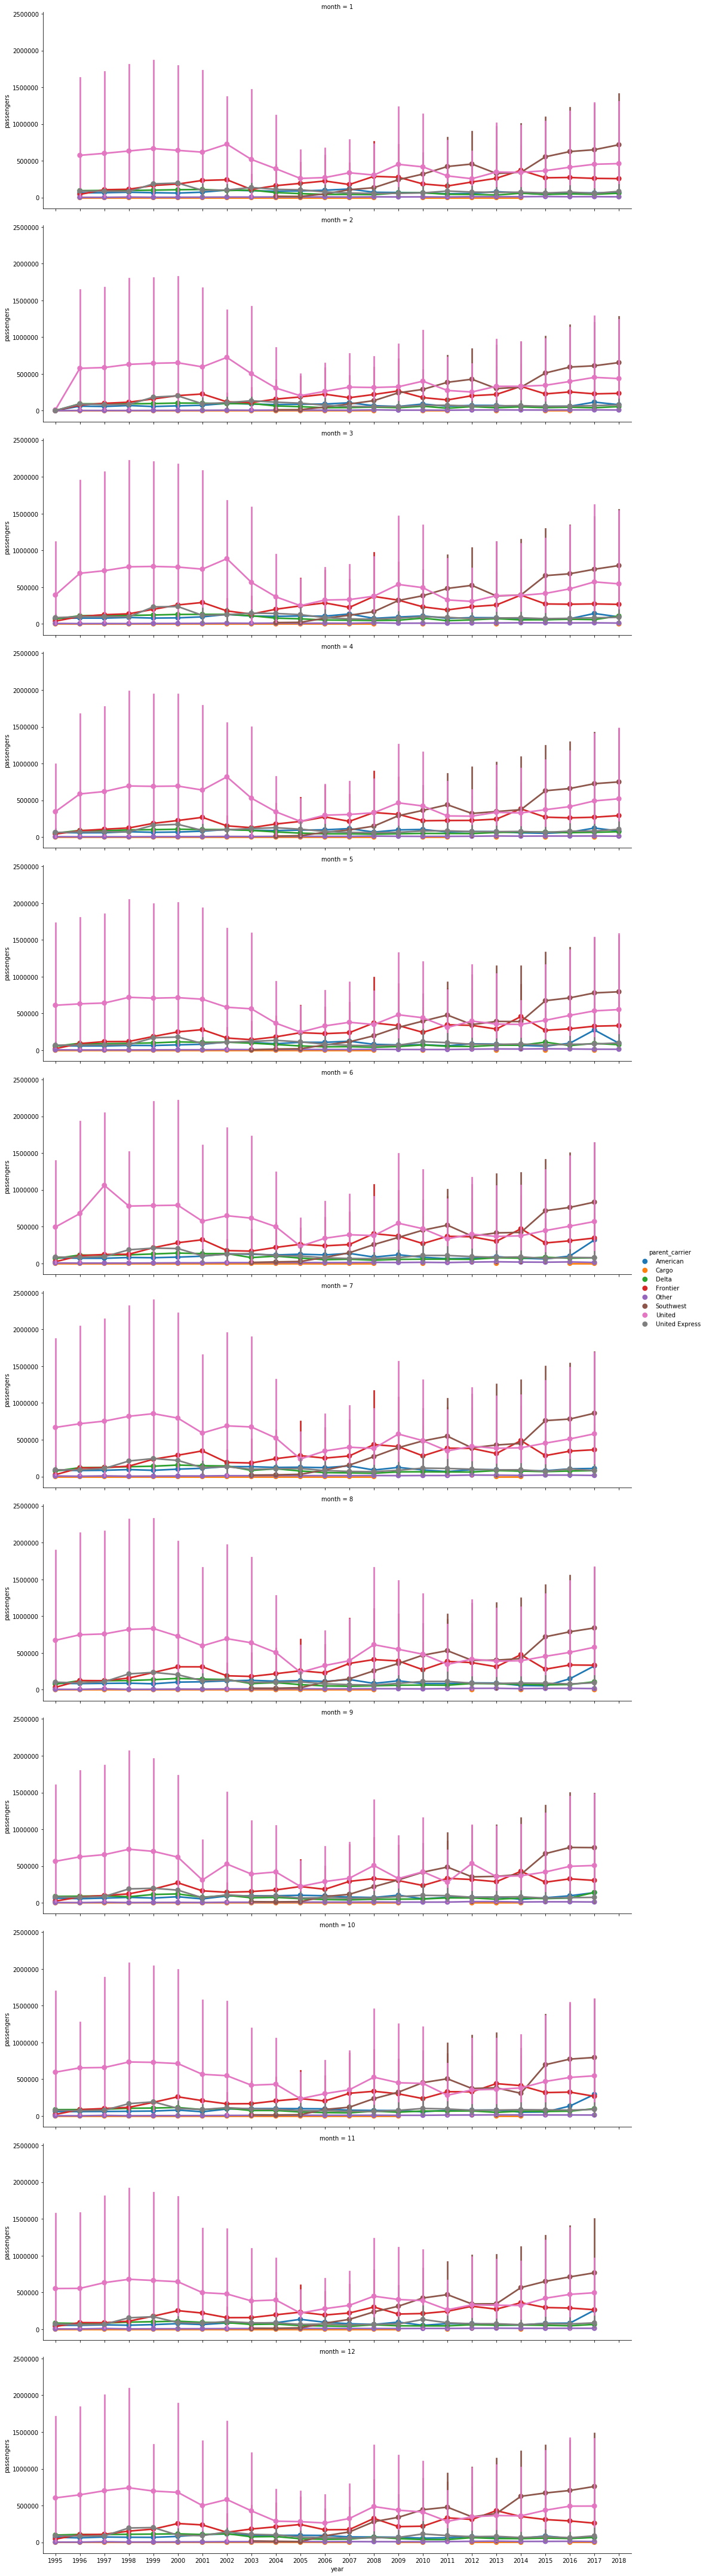

In [59]:
sb.catplot(x='year',y='passengers',hue='parent_carrier',row='month',data=passengers_df4,
           aspect=3,kind='point')

## Re-do clean-up for `flights_df`

Make a nice clean dataset so we can use both of them.

## Compute average monthly passengers per flight

(Hint: Confirm cleaned `passengers_df` and `flights_df` are similar dimensions)  
(Hint: You may also need to reference pandas's [`div`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.div.html) function.)

## Plot average monthly passengers per flight

Make a seaborn `catplot` with "month" on the x-axis, "passengers" on the y-axis, and hues for the different carriers. Is the top month still the same?